In [1]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [55]:
BASE_PATH = osp.join("results", "cifar-7-8-tr300")

Text(0.5, 1.0, 'SVM C=1')

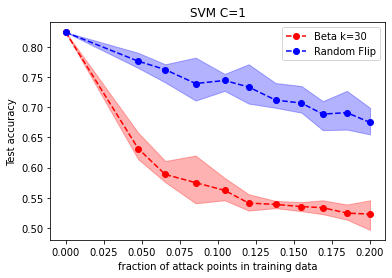

In [59]:
C = 1
model = "svm"

beta_df = pd.read_csv(osp.join(BASE_PATH, model, "beta_poison_k30.csv"))
beta_df = beta_df.loc[beta_df['c '] == 1]

flip_df = pd.read_csv(osp.join(BASE_PATH, model, "flip.csv"))
flip_df = flip_df.loc[flip_df['c '] == 1]

beta_agg = beta_df.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
beta_agg.reset_index(inplace=True)
flip_agg = flip_df.groupby("poison_fraction ")['test_acc '].agg(low='min',high='max',mean='mean')
flip_agg.reset_index(inplace=True)

ax  = beta_agg.plot(x='poison_fraction ', y='mean', c='r', linestyle='--', marker='o', label="Beta k=30")
flip_agg.plot(x='poison_fraction ', y='mean', c='b', linestyle='--', marker='o', label="Random Flip", ax=ax)
plt.fill_between(x='poison_fraction ',y1='low',y2='high', data=beta_agg, color=(1., 0., 0., 0.3))
plt.fill_between(x='poison_fraction ',y1='low',y2='high', data=flip_agg, color=(0., 0., 1., 0.3))
plt.xlabel("fraction of attack points in training data")
plt.ylabel('Test accuracy')
plt.title("SVM C=1")
# plt.title("MLP 1 Hidden Layer")